<b>Objective:<b> Build ML models to predict churn. The predictive model that we’re going to build will the following purposes:

-It will be used to predict whether a high-value customer will churn or not, in near future (i.e. churn phase). By knowing this, the company can take action steps such as providing special plans, discounts on recharge etc.

-It will be used to identify important variables that are strong predictors of churn. These variables may also indicate why customers choose to switch to other networks.

-Even though overall accuracy will be your primary evaluation metric, you should also mention other metrics like precision, recall, etc. for the different models that can be used for evaluation purposes based on different business objectives. For example, in this problem statement, one business goal can be to build an ML model that identifies customers who'll definitely churn with more accuracy as compared to the ones who'll not churn. Make sure you mention which metric can be used in such scenarios.

 -Recommend strategies to manage customer churn based on your observations.

In [1]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Read training data
df_train = pd.read_csv("train (1).csv")
df_train.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,...,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,...,0,0,NaN,1.0,NaN,710,0.0,0.0,0.0,0
2,2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,...,0,0,NaN,NaN,NaN,882,0.0,0.0,0.0,0
3,3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,...,0,0,NaN,NaN,NaN,982,0.0,0.0,0.0,0
4,4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,...,1,0,1.0,1.0,1.0,647,0.0,0.0,0.0,0


In [3]:
df_train.shape

(69999, 172)

In [4]:
# Check for null values
df_train.isna().sum()

id                     0
circle_id              0
loc_og_t2o_mou       702
std_og_t2o_mou       702
loc_ic_t2o_mou       702
                    ... 
aon                    0
aug_vbc_3g             0
jul_vbc_3g             0
jun_vbc_3g             0
churn_probability      0
Length: 172, dtype: int64

In [5]:
# Some cols have blank values, replace all blanks with zero
df_train.fillna(value=0, inplace=True)
df_train.isna().sum()

id                   0
circle_id            0
loc_og_t2o_mou       0
std_og_t2o_mou       0
loc_ic_t2o_mou       0
                    ..
aon                  0
aug_vbc_3g           0
jul_vbc_3g           0
jun_vbc_3g           0
churn_probability    0
Length: 172, dtype: int64

## 1. Data Cleanup for training set

In [6]:
# list of columns with all zero values
lst = df_train.columns[(df_train == 0).all()]
lst

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8'],
      dtype='object')

In [7]:
# Delete cols with all zero values
df_train = df_train.loc[:, (df_train != 0).any(axis=0)]
df_train.shape

(69999, 163)

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 163 entries, id to churn_probability
dtypes: float64(126), int64(28), object(9)
memory usage: 87.1+ MB


In [9]:
# Check for duplicate rows
df_train.columns[(df_train.duplicated() == True).all()]

array([], shape=(0, 163), dtype=object)

In [10]:
# Columns with more than 80% zero values
df_train.columns[((df_train==0).sum() > 56000)]

Index(['roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6',
       'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2c_mou_6',
       'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8',
       'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'og_others_6',
       'og_others_7', 'og_others_8', 'spl_ic_mou_7', 'spl_ic_mou_8',
       'isd_ic_mou_6', 'isd_ic_mou_7', 'isd_ic_mou_8', 'ic_others_7',
       'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_3g_6',
       'count_rech_3g_7', 'count_rech_3g_8', 'vol_3g_mb_6', 'vol_3g_mb_7',
       'vol_3g_mb_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6',
       'arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6', 'night_pck_user_7',
       'night_pck_user_8', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8',
       'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'monthly_3g_6',
       'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7',
       'sachet_3g_8', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'churn_probability'

In [11]:
# Checking the Object datatype columns
df_train.select_dtypes(include=["object"])

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8
0,6/30/2014,7/31/2014,8/31/2014,6/22/2014,7/10/2014,8/24/2014,0,0,0
1,6/30/2014,7/31/2014,8/31/2014,6/12/2014,7/10/2014,8/26/2014,0,7/8/2014,0
2,6/30/2014,7/31/2014,8/31/2014,6/11/2014,7/22/2014,8/24/2014,0,0,0
3,6/30/2014,7/31/2014,8/31/2014,6/15/2014,7/21/2014,8/25/2014,0,0,0
4,6/30/2014,7/31/2014,8/31/2014,6/25/2014,7/26/2014,8/30/2014,6/25/2014,7/23/2014,8/20/2014
...,...,...,...,...,...,...,...,...,...
69994,6/30/2014,7/31/2014,8/31/2014,6/18/2014,7/31/2014,8/31/2014,0,7/31/2014,8/21/2014
69995,6/30/2014,7/31/2014,8/31/2014,6/28/2014,7/31/2014,8/27/2014,0,0,0
69996,6/30/2014,7/31/2014,8/31/2014,6/25/2014,7/30/2014,8/29/2014,0,0,0
69997,6/30/2014,7/31/2014,8/31/2014,6/29/2014,7/19/2014,8/26/2014,6/17/2014,7/13/2014,8/14/2014


In [12]:
# Dropping last_date_of_month_6, last_date_of_month_7, last_date_of_month_8
df_train.last_date_of_month_8.describe()

count         69999
unique            2
top       8/31/2014
freq          69266
Name: last_date_of_month_8, dtype: object

In [13]:
df_train.drop(["last_date_of_month_6", "last_date_of_month_7", "last_date_of_month_8"], axis=1, inplace=True)
df_train.shape

(69999, 160)

In [14]:
# Checking for outliars in average revenue cols
cols = df_train[["arpu_6", "arpu_7", "arpu_8"]]
cols.describe(percentiles=[.25, .5, .75, .90])

,arpu_6,arpu_7,arpu_8
count,69999.000000,69999.000000,69999.000000
mean,283.134365,278.185912,278.858826
std,334.213918,344.366927,351.924315
min,-2258.709000,-1289.715000,-945.808000
25%,93.581000,86.714000,84.095000
50%,197.484000,191.588000,192.234000
75%,370.791000,365.369500,369.909000
90%,619.993800,615.661400,614.994600
max,27731.088000,35145.834000,33543.624000


# 2. EDA on train set

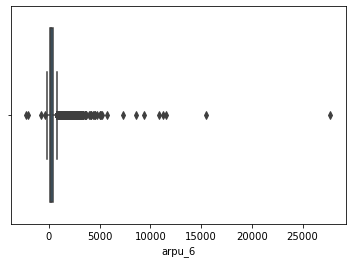

In [15]:
# Lot of outliars in revenue col
sns.boxplot(df_train["arpu_6"])
plt.show()

In [16]:
df_train[(df_train.arpu_6 <= 5000)].shape

(69986, 160)

In [17]:
df_train = df_train[(df_train.arpu_6 <= 5000)]
df_train.shape

(69986, 160)

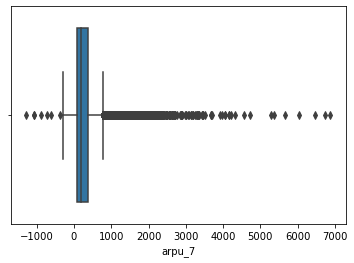

In [18]:
sns.boxplot(df_train["arpu_7"])
plt.show()

In [19]:
df_train[(df_train.arpu_7 <= 3000)].shape

(69945, 160)

In [20]:
df_train = df_train[(df_train.arpu_7 <= 3000)]
df_train.shape

(69945, 160)

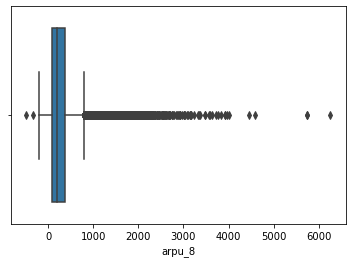

In [21]:
sns.boxplot(df_train["arpu_8"])
plt.show()

In [22]:
df_train[(df_train.arpu_8 <= 3000)].shape

(69914, 160)

In [23]:
df_train = df_train[(df_train.arpu_8 <= 3000)]
df_train.shape

(69914, 160)

<function matplotlib.pyplot.show(close=None, block=None)>

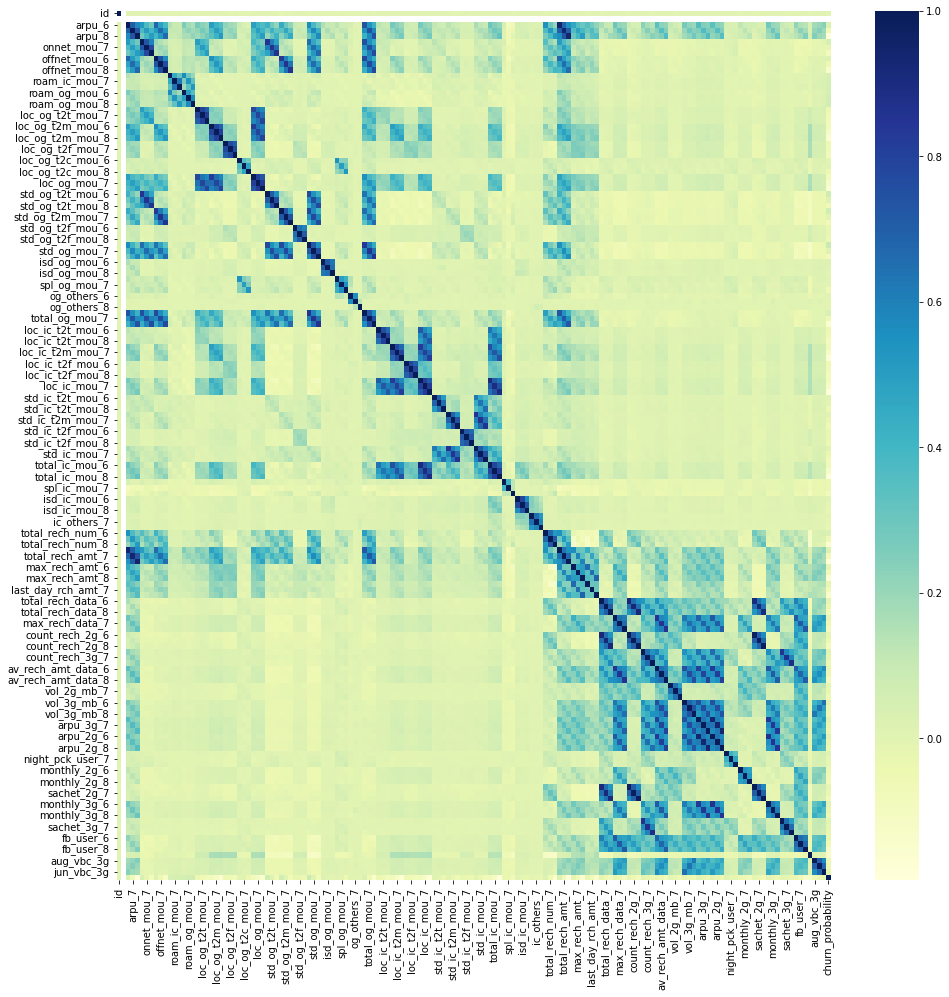

In [24]:
# Correlation plot
plt.figure(figsize=(16, 16))
sns.heatmap(df_train.corr(), cmap="YlGnBu")
plt.show

In [25]:
df_train_new = df_train.copy()

In [26]:
# *6, *7, *8 - KPI for the month of June, July, August. If date exists, that means customer did recharge that month. 
# Converting these cols to 1/0
df_train["date_of_last_rech_6"] = df_train["date_of_last_rech_6"].apply(lambda x: 1 if x!=0 else x)
df_train["date_of_last_rech_7"] = df_train["date_of_last_rech_7"].apply(lambda x: 1 if x!=0 else x)
df_train["date_of_last_rech_8"] = df_train["date_of_last_rech_8"].apply(lambda x: 1 if x!=0 else x)
df_train["date_of_last_rech_data_6"] = df_train["date_of_last_rech_data_6"].apply(lambda x: 1 if x!=0 else x)
df_train["date_of_last_rech_data_7"] = df_train["date_of_last_rech_data_7"].apply(lambda x: 1 if x!=0 else x)
df_train["date_of_last_rech_data_8"] = df_train["date_of_last_rech_data_8"].apply(lambda x: 1 if x!=0 else x)
df_train.head()

,id,circle_id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,...,0,0,0.0,0.0,0.0,1958,0.0,0.0,0.0,0
1,1,109,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,...,0,0,0.0,1.0,0.0,710,0.0,0.0,0.0,0
2,2,109,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,...,0,0,0.0,0.0,0.0,882,0.0,0.0,0.0,0
3,3,109,156.362,205.260,111.095,7.26,16.01,0.00,68.76,78.48,...,0,0,0.0,0.0,0.0,982,0.0,0.0,0.0,0
4,4,109,240.708,128.191,101.565,21.28,4.83,6.13,56.99,38.11,...,1,0,1.0,1.0,1.0,647,0.0,0.0,0.0,0


# 3. Scale features for training set

In [27]:
X_train = df_train.drop(["id", "churn_probability"], axis=1)
X_train.head()

,circle_id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,109,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,...,0,0,0,0.0,0.0,0.0,1958,0.0,0.0,0.0
1,109,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,...,0,0,0,0.0,1.0,0.0,710,0.0,0.0,0.0
2,109,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,...,0,0,0,0.0,0.0,0.0,882,0.0,0.0,0.0
3,109,156.362,205.260,111.095,7.26,16.01,0.00,68.76,78.48,50.23,...,0,0,0,0.0,0.0,0.0,982,0.0,0.0,0.0
4,109,240.708,128.191,101.565,21.28,4.83,6.13,56.99,38.11,9.63,...,0,1,0,1.0,1.0,1.0,647,0.0,0.0,0.0


In [28]:
y_train = df_train["churn_probability"]
y_train.head()

0    0
1    0
2    0
3    0
4    0
Name: churn_probability, dtype: int64

In [29]:
from sklearn.preprocessing import MinMaxScaler

In [30]:
scaler = MinMaxScaler()

cols = X_train.columns
X_train= pd.DataFrame(scaler.fit_transform(X_train), columns=cols)
 
X_train.head()

,circle_id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,0.0,0.158607,0.321353,0.144154,0.006586,0.015247,0.00012,0.003855,0.014344,0.000328,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.427712,0.0,0.0,0.0
1,0.0,0.152715,0.329704,0.154387,0.000000,0.000000,0.00000,0.000000,0.003856,0.004349,...,0.0,0.000000,0.0,0.0,1.0,0.0,0.127496,0.0,0.0,0.0
2,0.0,0.164169,0.325127,0.141980,0.000072,0.001953,0.00000,0.006456,0.012173,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.168872,0.0,0.0,0.0
3,0.0,0.182170,0.348955,0.174069,0.000984,0.001963,0.00000,0.008223,0.011644,0.007072,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.192928,0.0,0.0,0.0
4,0.0,0.198060,0.330966,0.171316,0.002885,0.000592,0.00057,0.006815,0.005654,0.001356,...,0.0,0.030303,0.0,1.0,1.0,1.0,0.112341,0.0,0.0,0.0


# 4. PCA for dimensionality reduction

In [31]:
from sklearn.decomposition import PCA

In [32]:
pca = PCA(random_state=42, n_components=50)

In [33]:
# Using PCA to reduce to 50 predictors from original 158
X_train_pca = pca.fit_transform(X_train)
X_train_pca.shape

(69914, 50)

# 5. Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier as RF

In [35]:
rf_Classifier = RF(n_estimators=300)

In [36]:
# Train Random Forest classifier model with training set
rf_Classifier.fit(X_train_pca, y_train)

RandomForestClassifier(n_estimators=300)

# 6. Clean and Scale test data

In [37]:
df_test = pd.read_csv("test (1).csv")
df_test.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,...,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,...,0,0,0,NaN,NaN,NaN,2533,0.00,0.00,0.00
2,70001,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,329.844,434.884,...,0,0,0,NaN,NaN,NaN,277,525.61,758.41,241.84
3,70002,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,43.550,171.390,...,0,0,0,NaN,NaN,NaN,1244,0.00,0.00,0.00
4,70003,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,306.854,406.289,...,0,0,0,NaN,NaN,NaN,462,0.00,0.00,0.00


In [38]:
df_test.shape

(30000, 171)

In [39]:
# Perform all the data cleaning steps done on training set
df_test.fillna(value=0, inplace=True)

In [40]:
df_test = df_test.loc[:, (df_test != 0).any(axis=0)]
df_test.head()

,id,circle_id,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,109,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,64.445,31.78,20.23,...,0,0,0,0.0,0.0,0.0,1692,0.00,0.00,0.00
1,70000,109,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,360.868,75.51,41.21,...,0,0,0,0.0,0.0,0.0,2533,0.00,0.00,0.00
2,70001,109,6/30/2014,7/31/2014,8/31/2014,329.844,434.884,746.239,7.54,7.86,...,0,0,0,0.0,0.0,0.0,277,525.61,758.41,241.84
3,70002,109,6/30/2014,7/31/2014,8/31/2014,43.550,171.390,24.400,5.31,2.16,...,0,0,0,0.0,0.0,0.0,1244,0.00,0.00,0.00
4,70003,109,6/30/2014,7/31/2014,8/31/2014,306.854,406.289,413.329,450.93,609.03,...,0,0,0,0.0,0.0,0.0,462,0.00,0.00,0.00


In [41]:
df_test.columns[(df_test.duplicated() == True).all()]

array([], shape=(0, 162), dtype=object)

In [42]:
df_test.drop(["last_date_of_month_6", "last_date_of_month_7", "last_date_of_month_8"], axis=1, inplace=True)

In [43]:
df_test.shape

(30000, 159)

In [44]:
df_test_new = df_test.copy()

In [45]:
df_test["date_of_last_rech_6"] = df_test["date_of_last_rech_6"].apply(lambda x: 1 if x!=0 else x)
df_test["date_of_last_rech_7"] = df_test["date_of_last_rech_7"].apply(lambda x: 1 if x!=0 else x)
df_test["date_of_last_rech_8"] = df_test["date_of_last_rech_8"].apply(lambda x: 1 if x!=0 else x)
df_test["date_of_last_rech_data_6"] = df_test["date_of_last_rech_data_6"].apply(lambda x: 1 if x!=0 else x)
df_test["date_of_last_rech_data_7"] = df_test["date_of_last_rech_data_7"].apply(lambda x: 1 if x!=0 else x)
df_test["date_of_last_rech_data_8"] = df_test["date_of_last_rech_data_8"].apply(lambda x: 1 if x!=0 else x)

In [46]:
# Divide into X and y
X_test = df_test.drop(["id"], axis=1)
X_test.head()

,circle_id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,109,91.882,65.330,64.445,31.78,20.23,23.11,60.16,32.16,34.83,...,0,0,0,0.0,0.0,0.0,1692,0.00,0.00,0.00
1,109,414.168,515.568,360.868,75.51,41.21,19.84,474.34,621.84,394.94,...,0,0,0,0.0,0.0,0.0,2533,0.00,0.00,0.00
2,109,329.844,434.884,746.239,7.54,7.86,8.40,16.98,45.81,45.04,...,0,0,0,0.0,0.0,0.0,277,525.61,758.41,241.84
3,109,43.550,171.390,24.400,5.31,2.16,0.00,40.04,205.01,24.01,...,0,0,0,0.0,0.0,0.0,1244,0.00,0.00,0.00
4,109,306.854,406.289,413.329,450.93,609.03,700.68,60.94,23.84,74.16,...,0,0,0,0.0,0.0,0.0,462,0.00,0.00,0.00


In [47]:
# Scale test set
cols = X_test.columns
X_test= pd.DataFrame(scaler.transform(X_test), columns=cols)
 
X_test.head()

,circle_id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,0.0,0.170024,0.316293,0.160595,0.004308,0.002480,0.002149,0.007194,0.004771,0.004904,...,0.0,0.0,0.0,0.0,0.0,0.0,0.363724,0.000000,0.000000,0.0000
1,0.0,0.230737,0.421387,0.246215,0.010236,0.005052,0.001845,0.056723,0.092260,0.055607,...,0.0,0.0,0.0,0.0,0.0,0.0,0.566033,0.000000,0.000000,0.0000
2,0.0,0.214851,0.402553,0.357527,0.001022,0.000963,0.000781,0.002031,0.006797,0.006342,...,0.0,0.0,0.0,0.0,0.0,0.0,0.023334,0.040694,0.082745,0.0319
3,0.0,0.160919,0.341049,0.149028,0.000720,0.000265,0.000000,0.004788,0.030417,0.003381,...,0.0,0.0,0.0,0.0,0.0,0.0,0.255954,0.000000,0.000000,0.0000
4,0.0,0.210521,0.395879,0.261368,0.061129,0.074656,0.065164,0.007287,0.003537,0.010442,...,0.0,0.0,0.0,0.0,0.0,0.0,0.067837,0.000000,0.000000,0.0000


In [48]:
# Transform using PCA model trained earlier
X_test_pca = pca.transform(X_test)
X_test_pca.shape

(30000, 50)

# 7. Predict using Random Forest classifier

In [49]:
y_test_pred = rf_Classifier.predict(X_test_pca)

In [50]:
y_test_pred.shape

(30000,)

In [51]:
np.savetxt('submission.csv', 
           np.c_[df_test.id,y_test_pred], 
           delimiter=',', 
           header = 'id,churn_probability', 
           comments = '', 
           fmt='%d')

In [52]:
# Submission score .90683

# 8. Building Random Forest - Model 2

In [53]:
pca70 = PCA(random_state=42, n_components=70)

X_train_pca70 = pca70.fit_transform(X_train)

rf_Classifier.fit(X_train_pca70, y_train)

RandomForestClassifier(n_estimators=300)

In [54]:
X_test_pca70 = pca70.transform(X_test)
y_test_pred70 = rf_Classifier.predict(X_test_pca70)

In [55]:
np.savetxt('submission1.csv', 
           np.c_[df_test.id,y_test_pred70], 
           delimiter=',', 
           header = 'id,churn_probability', 
           comments = '', 
           fmt='%d')

In [56]:
# Submission score .90746

# 9. Building Random forest - Model 3

In [57]:
pca80 = PCA(random_state=42, n_components=80)

X_train_pca80 = pca80.fit_transform(X_train)

rf_Classifier80 = RF(n_estimators=400)
rf_Classifier80.fit(X_train_pca80, y_train)

RandomForestClassifier(n_estimators=400)

In [58]:
X_test_pca80 = pca80.transform(X_test)
y_test_pred80 = rf_Classifier80.predict(X_test_pca80)

In [59]:
np.savetxt('submission2.csv', 
           np.c_[df_test.id,y_test_pred80], 
           delimiter=',', 
           header = 'id,churn_probability', 
           comments = '', 
           fmt='%d')

In [60]:
# Submission score .90513

# 10. Random forest - Model 4

In [61]:
pca75 = PCA(random_state=42, n_components=75)

X_train_pca75 = pca75.fit_transform(X_train)

rf_Classifier75 = RF(n_estimators=300)
rf_Classifier75.fit(X_train_pca75, y_train)

RandomForestClassifier(n_estimators=300)

In [62]:
X_test_pca75 = pca75.transform(X_test)
y_test_pred75 = rf_Classifier75.predict(X_test_pca75)

In [63]:
np.savetxt('submission3.csv', 
           np.c_[df_test.id,y_test_pred75], 
           delimiter=',', 
           header = 'id,churn_probability', 
           comments = '', 
           fmt='%d')

In [64]:
# No improvement in Score

# 11. Trying a different approach

In [65]:
# Extract date from the date_of_last_rech_* fields and perform rest of the steps as is
# Run the best model so far on this new train and test data
df_train_new.date_of_last_rech_6

0        6/22/2014
1        6/12/2014
2        6/11/2014
3        6/15/2014
4        6/25/2014
           ...    
69994    6/18/2014
69995    6/28/2014
69996    6/25/2014
69997    6/29/2014
69998    6/19/2014
Name: date_of_last_rech_6, Length: 69914, dtype: object

In [66]:
df_train_new.date_of_last_rech_6 = pd.to_datetime(df_train_new.date_of_last_rech_6)
df_train_new.date_of_last_rech_6

0       2014-06-22
1       2014-06-12
2       2014-06-11
3       2014-06-15
4       2014-06-25
           ...    
69994   2014-06-18
69995   2014-06-28
69996   2014-06-25
69997   2014-06-29
69998   2014-06-19
Name: date_of_last_rech_6, Length: 69914, dtype: datetime64[ns]

In [67]:
df_train_new.date_of_last_rech_6 = df_train_new.date_of_last_rech_6.apply(lambda x: x.day)
df_train_new.date_of_last_rech_6

0        22
1        12
2        11
3        15
4        25
         ..
69994    18
69995    28
69996    25
69997    29
69998    19
Name: date_of_last_rech_6, Length: 69914, dtype: int64

In [68]:
# Transform date fileds for new training set
df_train_new.date_of_last_rech_7 = pd.to_datetime(df_train_new.date_of_last_rech_7)
df_train_new.date_of_last_rech_8 = pd.to_datetime(df_train_new.date_of_last_rech_8)
df_train_new.date_of_last_rech_data_6 = pd.to_datetime(df_train_new.date_of_last_rech_data_6)
df_train_new.date_of_last_rech_data_7 = pd.to_datetime(df_train_new.date_of_last_rech_data_7)
df_train_new.date_of_last_rech_data_8 = pd.to_datetime(df_train_new.date_of_last_rech_data_8)
df_train_new.date_of_last_rech_data_8

0       1970-01-01
1       1970-01-01
2       1970-01-01
3       1970-01-01
4       2014-08-20
           ...    
69994   2014-08-21
69995   1970-01-01
69996   1970-01-01
69997   2014-08-14
69998   2014-08-08
Name: date_of_last_rech_data_8, Length: 69914, dtype: datetime64[ns]

In [69]:
df_train_new.date_of_last_rech_7 = df_train_new.date_of_last_rech_7.apply(lambda x: x.day)
df_train_new.date_of_last_rech_8 = df_train_new.date_of_last_rech_8.apply(lambda x: x.day)
df_train_new.date_of_last_rech_data_6 = df_train_new.date_of_last_rech_data_6.apply(lambda x: x.day)
df_train_new.date_of_last_rech_data_7 = df_train_new.date_of_last_rech_data_7.apply(lambda x: x.day)
df_train_new.date_of_last_rech_data_8 = df_train_new.date_of_last_rech_data_8.apply(lambda x: x.day)
df_train_new.date_of_last_rech_data_8

0         1
1         1
2         1
3         1
4        20
         ..
69994    21
69995     1
69996     1
69997    14
69998     8
Name: date_of_last_rech_data_8, Length: 69914, dtype: int64

In [70]:
X_train_new = df_train_new.drop(["id", "churn_probability"], axis=1)
y_train_new = df_train_new["churn_probability"]

In [76]:
scaler_new = MinMaxScaler()

cols = X_train_new.columns
X_train_new= pd.DataFrame(scaler_new.fit_transform(X_train_new), columns=cols)
 
X_train_new.head()

,circle_id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,0.0,0.158607,0.321353,0.144154,0.006586,0.015247,0.00012,0.003855,0.014344,0.000328,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.427712,0.0,0.0,0.0
1,0.0,0.152715,0.329704,0.154387,0.000000,0.000000,0.00000,0.000000,0.003856,0.004349,...,0.0,0.000000,0.0,0.0,1.0,0.0,0.127496,0.0,0.0,0.0
2,0.0,0.164169,0.325127,0.141980,0.000072,0.001953,0.00000,0.006456,0.012173,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.168872,0.0,0.0,0.0
3,0.0,0.182170,0.348955,0.174069,0.000984,0.001963,0.00000,0.008223,0.011644,0.007072,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.192928,0.0,0.0,0.0
4,0.0,0.198060,0.330966,0.171316,0.002885,0.000592,0.00057,0.006815,0.005654,0.001356,...,0.0,0.030303,0.0,1.0,1.0,1.0,0.112341,0.0,0.0,0.0


In [72]:
# Transform new test set
df_test_new.date_of_last_rech_6 = pd.to_datetime(df_test_new.date_of_last_rech_6)
df_test_new.date_of_last_rech_7 = pd.to_datetime(df_test_new.date_of_last_rech_7)
df_test_new.date_of_last_rech_8 = pd.to_datetime(df_test_new.date_of_last_rech_8)
df_test_new.date_of_last_rech_data_6 = pd.to_datetime(df_test_new.date_of_last_rech_data_6)
df_test_new.date_of_last_rech_data_7 = pd.to_datetime(df_test_new.date_of_last_rech_data_7)
df_test_new.date_of_last_rech_data_8 = pd.to_datetime(df_test_new.date_of_last_rech_data_8)

In [73]:
df_test_new.date_of_last_rech_6 = df_test_new.date_of_last_rech_6.apply(lambda x: x.day)
df_test_new.date_of_last_rech_7 = df_test_new.date_of_last_rech_7.apply(lambda x: x.day)
df_test_new.date_of_last_rech_8 = df_test_new.date_of_last_rech_8.apply(lambda x: x.day)
df_test_new.date_of_last_rech_data_6 = df_test_new.date_of_last_rech_data_6.apply(lambda x: x.day)
df_test_new.date_of_last_rech_data_7 = df_test_new.date_of_last_rech_data_7.apply(lambda x: x.day)
df_test_new.date_of_last_rech_data_8 = df_test_new.date_of_last_rech_data_8.apply(lambda x: x.day)

In [74]:
X_test_new = df_test_new.drop(["id"], axis=1)

In [77]:
cols = X_test_new.columns
X_test_new= pd.DataFrame(scaler_new.transform(X_test_new), columns=cols)
 
X_test_new.head()

,circle_id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,109.0,91.882,65.330,64.445,31.78,20.23,23.11,60.16,32.16,34.83,...,0.0,0.0,0.0,0.0,0.0,0.0,1692.0,0.00,0.00,0.00
1,109.0,414.168,515.568,360.868,75.51,41.21,19.84,474.34,621.84,394.94,...,0.0,0.0,0.0,0.0,0.0,0.0,2533.0,0.00,0.00,0.00
2,109.0,329.844,434.884,746.239,7.54,7.86,8.40,16.98,45.81,45.04,...,0.0,0.0,0.0,0.0,0.0,0.0,277.0,525.61,758.41,241.84
3,109.0,43.550,171.390,24.400,5.31,2.16,0.00,40.04,205.01,24.01,...,0.0,0.0,0.0,0.0,0.0,0.0,1244.0,0.00,0.00,0.00
4,109.0,306.854,406.289,413.329,450.93,609.03,700.68,60.94,23.84,74.16,...,0.0,0.0,0.0,0.0,0.0,0.0,462.0,0.00,0.00,0.00


In [80]:
# Building model with new data sets
pca70_new = PCA(random_state=42, n_components=70)

X_train_pca70_new = pca70_new.fit_transform(X_train_new)

rf_Classifier.fit(X_train_pca70_new, y_train_new)

RandomForestClassifier(n_estimators=300)

In [81]:
X_test_pca70_new = pca70_new.transform(X_test_new)
y_test_pred70_new = rf_Classifier.predict(X_test_pca70_new)

In [82]:
np.savetxt('submission4.csv', 
           np.c_[df_test_new.id,y_test_pred70_new], 
           delimiter=',', 
           header = 'id,churn_probability', 
           comments = '', 
           fmt='%d')

In [83]:
# It did not help improving the score